In [30]:
# Importing necessary libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading the files into Pandas

new_client_data_df = pd.read_csv(r"C:\Users\rauna\Downloads\clean_data_after_eda.csv")
new_client_data_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [3]:
new_client_data_df.dtypes
new_client_data_df.describe()
new_client_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [5]:
# Removing Irrelevant Columns

# Dropping Id column as its unique for every customer and does not really contribute to the predictive analysis and columns with only one unique value.

remove_col = ['id']
for col in new_client_data_df.columns:
    if new_client_data_df[col].nunique == 1:
        remove_col.append(col)
df2 = new_client_data_df.drop( columns = remove_col)

In [8]:
# Extract date components from 'date_activ'

new_client_data_df['activation_year'] = pd.to_datetime(new_client_data_df['date_activ']).dt.year
new_client_data_df['activation_month'] = pd.to_datetime(new_client_data_df['date_activ']).dt.month
new_client_data_df['activation_day'] = pd.to_datetime(new_client_data_df['date_activ']).dt.day

In [9]:
# Calculating price difference between December and January

price_data_df = pd.read_csv(r"C:\Users\rauna\Downloads\price_data (1).csv")
price_data_df.head()


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [11]:
# Extract the month and year from the price dataset
price_data_df['price_date'] = pd.to_datetime(price_data_df['price_date'])
price_data_df['month'] = price_data_df['price_date'].dt.month
price_data_df['year'] = price_data_df['price_date'].dt.year

In [14]:
# Extract December and January prices

dec_prices = price_data_df[price_data_df['month'] == 12][['id', 'price_off_peak_var', 'year']].rename(columns={'price_off_peak_var': 'dec_price_off_peak_var', 'year': 'dec_year'})
jan_prices = price_data_df[price_data_df['month'] == 1][['id', 'price_off_peak_var', 'year']].rename(columns={'price_off_peak_var': 'jan_price_off_peak_var', 'year': 'jan_year'})


In [15]:
# Merging to find the difference

price_diff = pd.merge(dec_prices, jan_prices, left_on=['id', 'dec_year'], right_on=['id', 'jan_year'])
price_diff['price_diff_dec_jan'] = price_diff['dec_price_off_peak_var'] - price_diff['jan_price_off_peak_var']


In [17]:
# Merge the price difference back into the client data

# Doing a left join indiacting that all rows from the new_client_data_df will be kept and matching rows from the price_diffdec_jan will be included.

new_client_data_df = pd.merge(new_client_data_df, price_diff[['id', 'price_diff_dec_jan']], on='id', how='left')
new_client_data_df



,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,activation_year,activation_month,activation_day,price_diff_dec_jan
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,2013,6,15,0.020057
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,2009,8,21,-0.003767
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,2010,4,16,-0.004670
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,2010,3,30,-0.004547
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,2010,1,13,-0.006192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,2012,5,24,-0.008653
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04,1,2012,8,27,-0.007395
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,1,2012,2,8,-0.006192
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,2012,8,30,-0.003767


In [21]:
# Combining related columns to a single feature

# Combining consumption of electricity adn gas over 12 months, as it gives us a total etric which coule help us predict the consumer churn

new_client_data_df['total_consumption'] = new_client_data_df['cons_12m'] + new_client_data_df['cons_gas_12m']

# Similar logic for the forcasted consumption as it can give us an idea of what the future consumption will look like

new_client_data_df['forecasted_total'] = new_client_data_df['forecast_cons_12m'] + new_client_data_df['forecast_cons_year']

new_client_data_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,activation_year,activation_month,activation_day,price_diff_dec_jan,total_consumption,forecasted_total
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2.086425,9.953056e+01,4.423670e+01,1,2013,6,15,0.020057,54946,0.00
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.009485,1.217891e-03,0.000000e+00,0,2009,8,21,-0.003767,4660,189.95
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0,2010,4,16,-0.004670,544,47.96
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0,2010,3,30,-0.004547,1584,240.04
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0,2010,1,13,-0.006192,4425,971.75


In [23]:
# As we are analysing churn, lets asume its binary so 0 for retention and 1 for Churn

# Drop rows with missing values in the churn column

new_client_data_df =  new_client_data_df.dropna(subset = ['churn'])

# Fill missing value in the datset with 0

new_client_data_df = new_client_data_df.fillna(0)

new_client_data_df


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,activation_year,activation_month,activation_day,price_diff_dec_jan,total_consumption,forecasted_total
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2.086425,9.953056e+01,4.423670e+01,1,2013,6,15,0.020057,54946,0.00
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.009485,1.217891e-03,0.000000e+00,0,2009,8,21,-0.003767,4660,189.95
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0,2010,4,16,-0.004670,544,47.96
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0,2010,3,30,-0.004547,1584,240.04
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0,2010,1,13,-0.006192,4425,971.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000003,0.000000e+00,0.000000e+00,0,2012,5,24,-0.008653,80210,4648.01
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.014948,5.684001e-03,2.987132e-04,1,2012,8,27,-0.007395,7223,812.69
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.000011,2.896760e-06,4.860000e-10,1,2012,2,8,-0.006192,1844,369.39
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.009485,1.217891e-03,0.000000e+00,0,2012,8,30,-0.003767,131,19.34


In [25]:
# Divinding Data into Features

# Here x contains the input features and y contains the dependent variable that we are trying to predict.
x = new_client_data_df.drop(columns=['churn'])
y = new_client_data_df['churn']

Accuracy: 0.9030123231401187
Precision: 0.7586206896551724
Recall: 0.05
F1 Score: 0.09381663113006397
ROC AUC Score: 0.6556887366818874
                           Feature  Importance
18              margin_net_pow_ele    0.044286
11         forecast_meter_rent_12m    0.043936
46               total_consumption    0.043512
17            margin_gross_pow_ele    0.042827
4                       date_activ    0.042559
20                      net_margin    0.042530
1                         cons_12m    0.041753
47                forecasted_total    0.040543
8                forecast_cons_12m    0.040215
6                  date_modif_prod    0.037358
5                         date_end    0.036593
7                     date_renewal    0.035590
24     var_year_price_off_peak_var    0.034067
23                         pow_max    0.032518
44                  activation_day    0.030335
3                  cons_last_month    0.029784
45              price_diff_dec_jan    0.029518
12  forecast_price

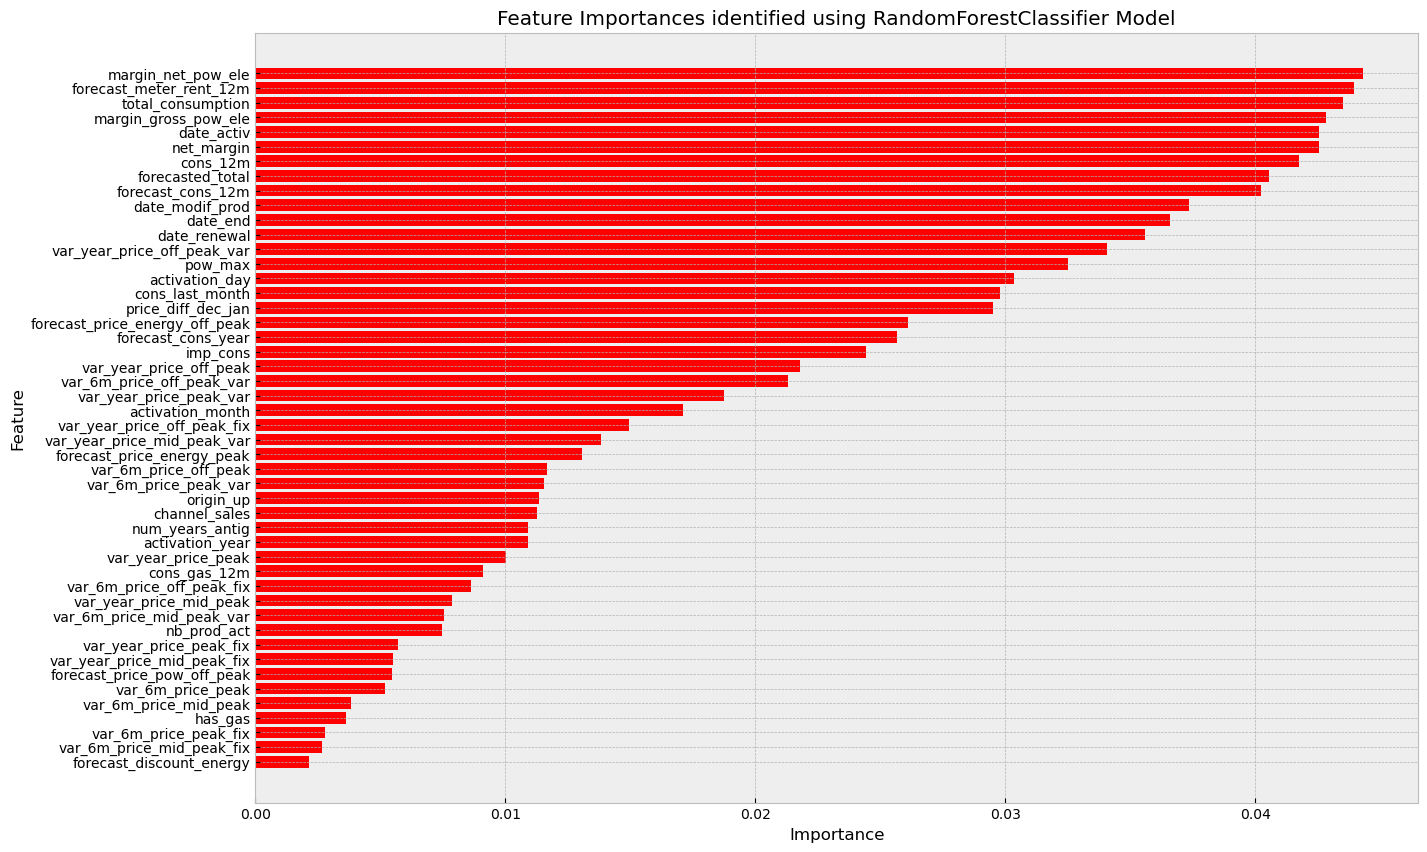

In [53]:
# Identify non-numeric columns

non_numeric_columns = new_client_data_df.select_dtypes(include=['object']).columns

# Encode non-numeric columns
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    new_client_data_df[column] = le.fit_transform(new_client_data_df[column])
    label_encoders[column] = le

# Ensuring all data is numeric and convert any remaining strings to NaNs
new_client_data_df = new_client_data_df.apply(pd.to_numeric, errors='coerce')

# Fill or drop NaNs if necessary
new_client_data_df = new_client_data_df.fillna(0)

# Verify data types
# print(new_client_data_df.dtypes)

# Divinding Data into Features

# Here x contains the input features and y contains the dependent variable that we are trying to predict.
X = new_client_data_df.drop(columns=['churn', 'id'])
y = new_client_data_df['churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the scaled features
# print(X_train_scaled)
# print(X_test_scaled)


rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_scaled, y_train)

# Predictions

# Used to predict the class lables 

y_predict = rf.predict(X_test_scaled)


y_predict_prob = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the Model
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_predict_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


# Feature Importance
feature_importance = rf.feature_importances_
feature_names = X.columns
important_features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
print(important_features)

# Plotting Feature Importances
plt.figure(figsize=(15, 10))
plt.title('Feature Importances identified using RandomForestClassifier Model')
plt.barh(important_features['Feature'], important_features['Importance'], color='r', align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [ ]:
# Margin Net Power Electricity (margin_net_pow_ele)- The net profit margin on power subscriptions impacts customer churn the most , indicating that higher profitability per customer means  lower churn rates.

# Forecast Meter Rent 12m (forecast_meter_rent_12m): Suggests that customers are sensitive to long-term cost predictions.

# Consumption- Possibly implying the highter showing higher usage can determine this as well based on the qualityf Service being provided.